![Logo_Conestoga](https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png)

Artificial Intelligence for Business Decisions and Transformation 
&nbsp; 

CSCN8030 - Spring 2024 - Section 2
&nbsp; 

Professor: Glaucia Melo dos Santos, PhD
&nbsp;

Group 4 - Members:<br>

Krishna Kumar, Hemasree<br>
Shijin, Jency<br>
Fernandez, Arcadio<br>

## Sprint 4  Development:

# Project: Loblaws Digital - predict customer attrition and determine strategies 

<br>


# 1. Introduction: A brief introduction to the problem, libraries and obtaining the data.

###  1.1. A brief introduction to the problem

Loblaws Digital faces the challenge of identifying customers who are likely to churn and developing strategies to retain them. Predicting customer attrition and understanding the factors contributing to it can help Loblaws Digital take proactive measures to enhance customer loyalty and reduce churn rates.


Goal : 

The primary goal of this project is to build a predictive model that accurately identifies customers at risk of leaving the company based on various customer-related variables. By leveraging the insights gained from the model, Loblaws Digital can implement targeted retention strategies to keep customers loyal. Additionally, a thorough exploratory analysis of the provided customer data will help uncover patterns and trends, offering valuable insights into customer behavior and informing future decision-making.

Dataset :

The dataset provided contains various attributes related to customers of Loblaws Digital.  Each row represents a unique customer, and the columns represent different attributes or features associated with the customers


1.	CustomerID:  A unique identifier for each customer.

2.	Churn:  Indicates whether the customer has churned (1) or not (0).

3.	Tenure:  The duration (in months) that the customer has been with the organization.

4.	PreferredLoginDevice:  The device (e.g., mobile phone, computer) that the customer primarily uses to log into their account.

5.	CityTier:  The tier of the city where the customer resides, indicating the city's economic and demographic classification.

6.	WarehouseToHome:  The distance (in kilometers) between the warehouse and the customer's home.

7.	PreferredPaymentMode:  The payment method (e.g., credit card, debit card, UPI) that the customer prefers to use.

8.	Gender:  The gender of the customer (e.g., male, female).

9.	HourSpendOnApp:  The number of hours the customer spends on the mobile application or website.

10.	NumberOfDeviceRegistered:  The total number of devices registered under the customer's account.

11.	PreferedOrderCat:  The category of products that the customer preferred to order in the last month.

12.	SatisfactionScore:  The customer's satisfaction score with the service, typically rated on a scale from 1 to 5.

13.	MaritalStatus:  The marital status of the customer (e.g., single, married, divorced).

14.	NumberOfAddress:  The total number of addresses added to the customer's account.

15.	Complain:  Indicates if the customer has raised any complaints in the last month (1 for yes, 0 for no).

16.	OrderAmountHikeFromlastYear:  The percentage increase in the order amount compared to the previous year.

17.	CouponUsed:  The total number of coupons used by the customer in the last month.

18.	OrderCount:  The total number of orders placed by the customer in the last month.

19.	DaySinceLastOrder:  The number of days since the customer last placed an order.

20.	CashbackAmount:  The average cashback amount received by the customer in the last month


### 1.2. Importing all the essential libraries and sub modules

In [65]:
# Import Libraries
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
from matplotlib import pyplot as plt


### 1.3. Obtaining the Data

In [66]:
import pandas as pd

# Load the data from excel files to dataframe
data_path = r'Data\loblaws.xlsx'
customer_df = pd.read_excel(data_path, sheet_name='E Comm')


In [67]:
display(customer_df)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


# 2. Exploratory data analysis - EDA

## 2.1. Basic data analysis

In [68]:
# Checking the dataset shape
print(customer_df.shape)

(5630, 20)


The dataframe has 5630 entries (rows) and 20 columns.

In [69]:
# Viewing the first few rows of the dataset
customer_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [70]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [71]:
customer_df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [72]:
customer_df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

## 2.2. Statistical analysis

In [75]:
customer_df.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


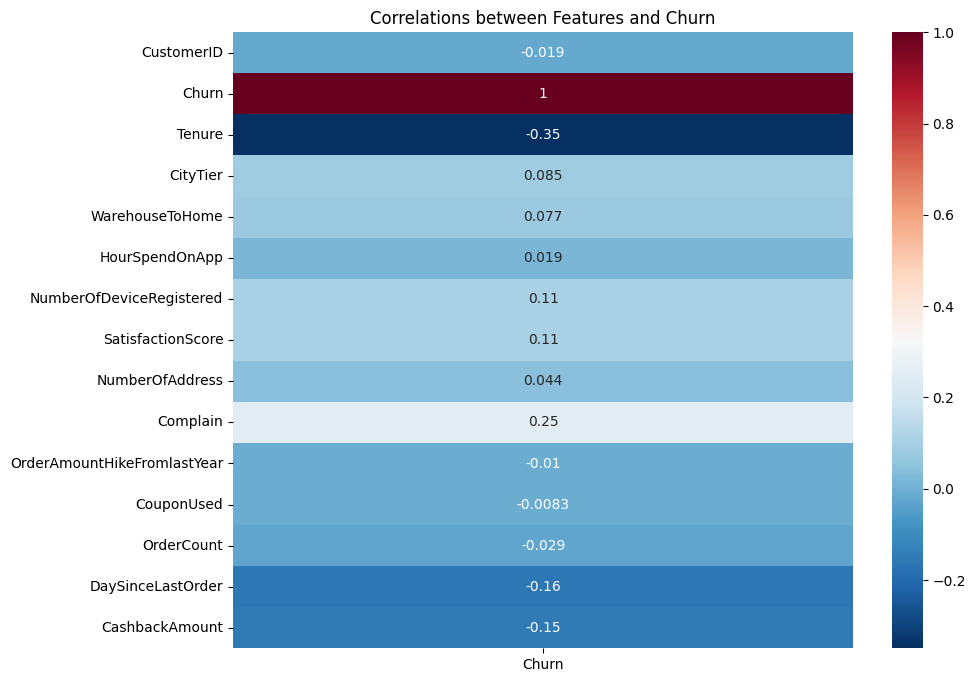

In [76]:
corr_matrix = customer_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Churn']], annot=True, cmap='RdBu_r')
plt.title('Correlations between Features and Churn')
plt.show()

- Heatmap provided represents the correlation between different features and the ‘Churn’ variable in the dataset.
-  ‘Tenure’ and ‘CashbackAmount’ have a negative correlation with ‘Churn’.
-  ‘Complain’ has a positive correlation with ‘Churn’.
-  ‘OrderAmountHikeFromlastYear’ and ‘CouponUsed’ have a weak correlation with ‘Churn’.

## 2.3. Customer analysis

###  Gender and Churn

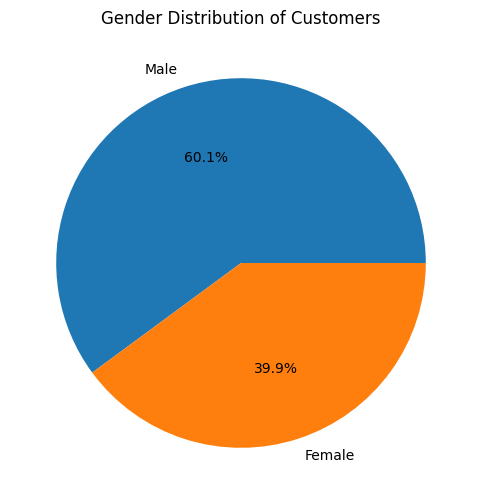

In [77]:
plt.figure(figsize=(6, 6))
gender_counts = customer_df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

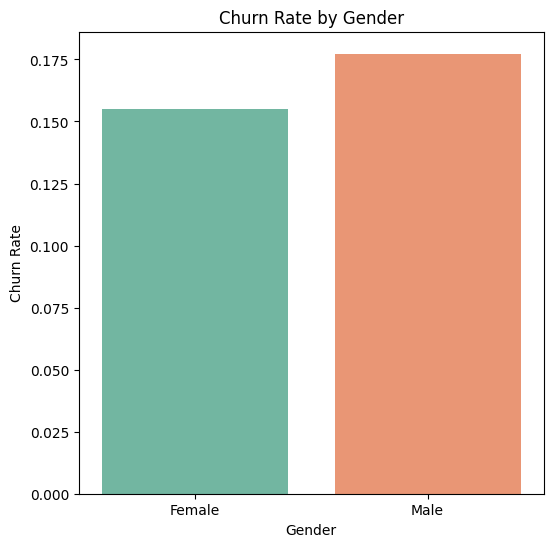

In [78]:
gender_churn_rate = customer_df.groupby('Gender')['Churn'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

More than half of the customers are Male .And the churn rate of the male customers are much higher than the female customers

###  Tenure and Churn

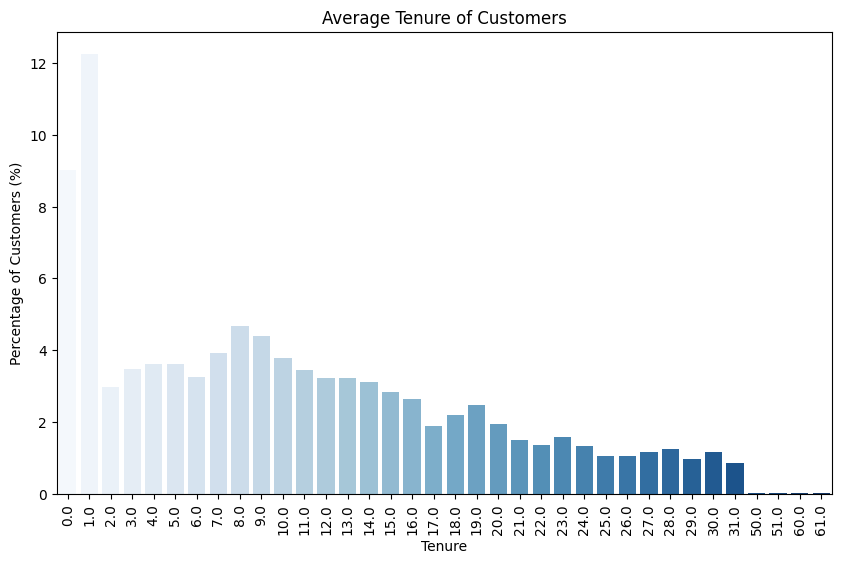

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure', y='Tenure', data=customer_df, estimator=lambda x: len(x) / len(customer_df) * 100 , palette='Blues')
plt.xlabel('Tenure')
plt.ylabel('Percentage of Customers (%)')
plt.title('Average Tenure of Customers')
plt.xticks(rotation=90)
plt.show()

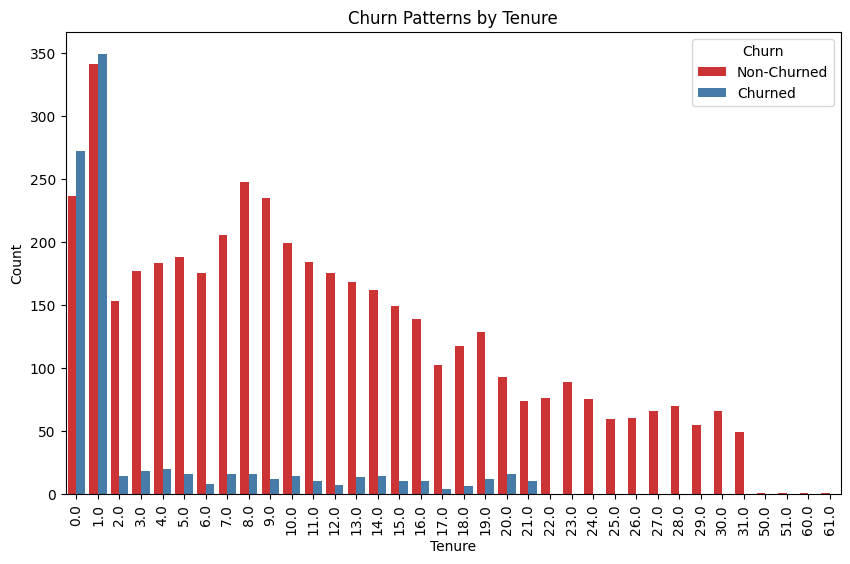

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', hue='Churn', data=customer_df, palette='Set1')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churn Patterns by Tenure')
plt.legend(title='Churn', labels=['Non-Churned', 'Churned'])
plt.xticks(rotation=90)
plt.show()

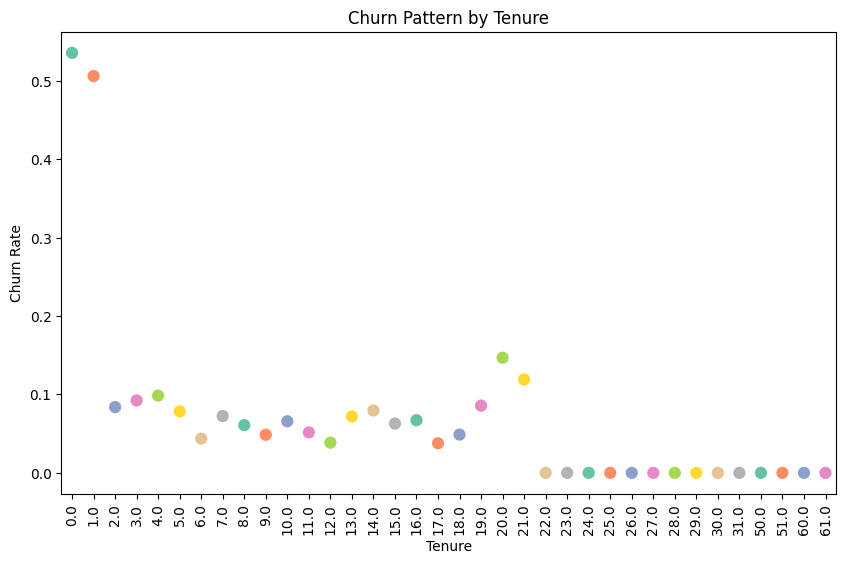

In [81]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Tenure', y='Churn', data=customer_df, errorbar=None,  palette='Set2')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Tenure')
plt.xticks(rotation=90)
plt.show()

The churn rate in new customers(1-5 month tenure) and 12 to 24 month tenure is higher than others

###  Days since Last Order and Churn

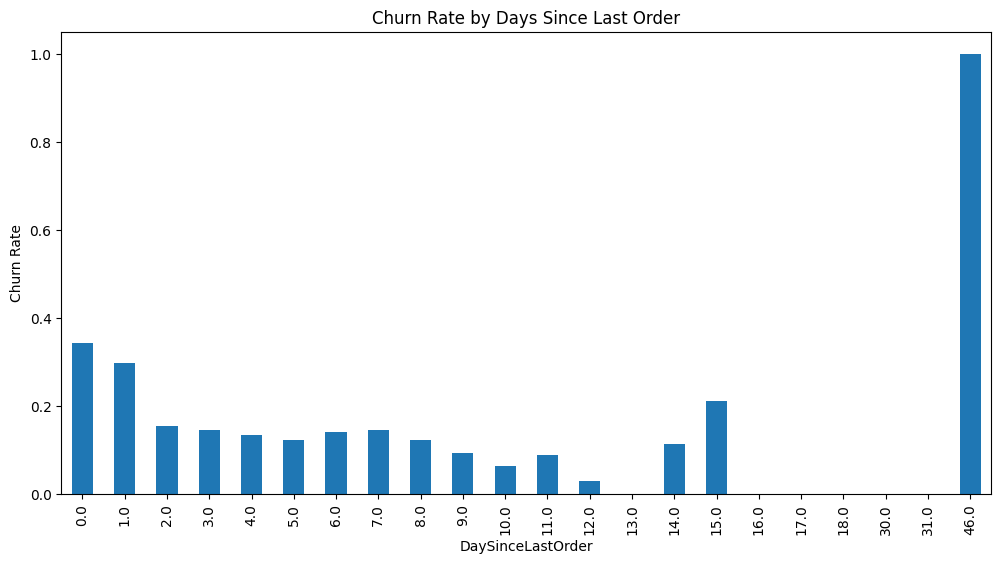

In [82]:
# Group by 'DaySinceLastOrder' and calculate churn rate
churn_rate_by_days_since_last_order = customer_df.groupby('DaySinceLastOrder')['Churn'].mean()

# Plot
churn_rate_by_days_since_last_order.plot(kind='bar', figsize=(12,6))
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Days Since Last Order')
plt.show()

The plot shows that Customers who haven’t ordered recently are more likely to churn.

###  Cash back Amount and Churn

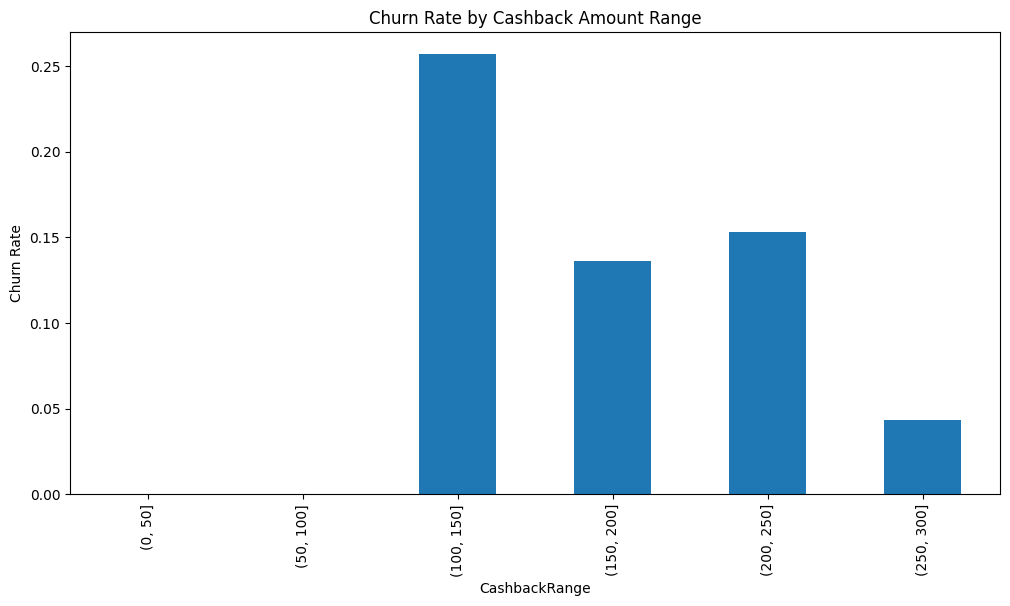

In [83]:
# Define the ranges for cashback amounts
bins = [0, 50, 100, 150, 200, 250, 300]

# Create a new column in the DataFrame that indicates which range each customer's cashback amount falls into
customer_df['CashbackRange'] = pd.cut(customer_df['CashbackAmount'], bins)

# Group by the cashback range and calculate the churn rate
churn_rate_by_cashback_range = customer_df.groupby('CashbackRange')['Churn'].mean()

# Plot the churn rate for each cashback range
churn_rate_by_cashback_range.plot(kind='bar', figsize=(12,6))
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Cashback Amount Range')
plt.show()

 - ‘CashbackAmount’  ranges from 0 to 300. This represents the average cashback amount received by the customer in the last month.
 -  visualized the the churn rate for different ranges of cashback amounts (for example, 0-50, 50-100, 100-150, etc.)
 -  It appears that the churn rate varies across different cashback amount range suggesting  that the cashback amount could be a significant factor influencing customer churn
 - 

In [84]:
customer_df.drop(columns =['CashbackRange'],  inplace=True)

###  Complain and Churn

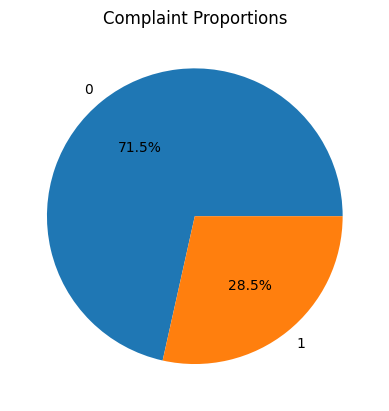

In [114]:
# Calculate the proportion of complaints and non-complaints
complaint_proportions = customer_df['Complain'].value_counts(normalize=True)

# Create the pie chart
plt.pie(complaint_proportions, labels=complaint_proportions.index, autopct='%1.1f%%')
plt.title('Complaint Proportions')
plt.show()

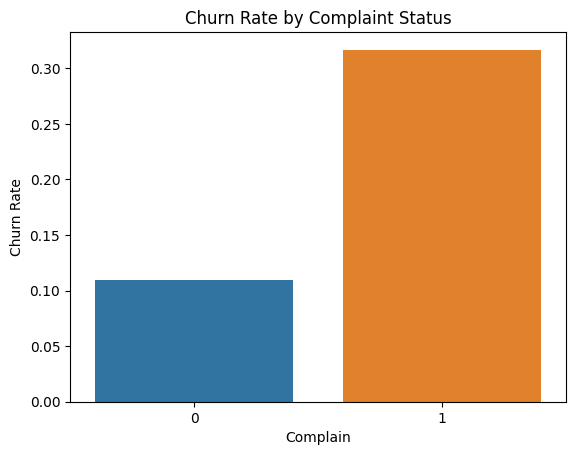

In [115]:
# Calculate the churn rate for each complaint status
churn_rate_by_complaint = customer_df.groupby('Complain')['Churn'].mean()

# Create the bar plot
sns.barplot(x=churn_rate_by_complaint.index, y=churn_rate_by_complaint.values)
plt.xlabel('Complain')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Complaint Status')
plt.show()

- Shows the churn rate for customers who have made a complaint (Complain = 1) and those who haven’t (Complain = 0).
- Customers who have made a complaint (Complain = 1) have a higher churn rate
- Complaints are often a sign of customer dissatisfaction and hence could be a reason for customer churn

# 3. Data Preprocessing

## 3.1. Drop duplicates in the dataset

In [85]:
customer_df.duplicated().sum()

0

## 3.2. Check for missing values in the dataset

In [86]:
# Checking for missing values
customer_df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [87]:
missing = pd.DataFrame(customer_df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / customer_df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
2,Tenure,4.689165
5,WarehouseToHome,4.458259
8,HourSpendOnApp,4.529307
15,OrderAmountHikeFromlastYear,4.706927
16,CouponUsed,4.547069
17,OrderCount,4.582593
18,DaySinceLastOrder,5.452931


All the features have less than 5% missing values except DaysSinceLastOrder.

## 3.3. Handling with missing values in the dataset

In [98]:

# Impute missing values for numerical columns with mean
numerical_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
for col in numerical_cols:
    customer_df[col] = customer_df[col].fillna(customer_df[col].mean())


# Verify missing values are handled
print(customer_df.isnull().sum())



CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [99]:
customer_df.shape

(5630, 20)

## 3.4. Encode categorical variables into a numerical format using techniques like one-hot encoding or label encoding.

### 3.5.1. Data before the encode

In [100]:
display(customer_df)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.000000,159.93
1,50002,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.000000,120.90
2,50003,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.000000,120.28
3,50004,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.000000,134.07
4,50005,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.000000,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.000000,Computer,1,30.0,Credit Card,Male,3.000000,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.000000,150.71
5626,55627,0,13.000000,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.543491,224.91
5627,55628,0,1.000000,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.000000,186.42
5628,55629,0,23.000000,Computer,3,9.0,Credit Card,Male,4.000000,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.000000,178.90


In [101]:
categorical_columns = customer_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

To encode categorical variables in customer_df dataset, we can use techniques like one-hot encoding or label encoding.

First, we will identify the categorical variables in this dataset:

1. PreferredLoginDevice
2. PreferredPaymentMode
3. Gender
4. PreferedOrderCat
5. MaritalStatus



In [102]:
customer_df.PreferredLoginDevice.value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [103]:
customer_df.PreferredPaymentMode.value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [104]:
customer_df.Gender.value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [105]:
customer_df.PreferedOrderCat.value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [106]:
customer_df.MaritalStatus.value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

 ‘Gender’ is a binary categorical variable, using label encoding is simpler and doesn’t increase the dimensionality of the data

In [108]:

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column
customer_df['Gender'] = label_encoder.fit_transform(customer_df['Gender'])



'PreferredLoginDevice' , 'PreferredPaymentMode' ,  'PreferedOrderCat', 'MaritalStatus' are nominal categorical variables so we perform one-hot encoding  

In [110]:
from sklearn.preprocessing import OneHotEncoder

customer_df_encoded = pd.get_dummies(customer_df,columns = ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus'], drop_first = True)
customer_df_encoded = customer_df_encoded.astype(int)
customer_df_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4,3,6,0,3,3,2,9,...,1,0,0,0,1,0,0,0,0,1
1,50002,1,10,1,8,1,3,4,3,7,...,0,0,1,0,0,1,0,0,0,1
2,50003,1,10,1,30,1,2,4,3,6,...,1,0,0,0,0,1,0,0,0,1
3,50004,1,0,3,15,1,2,4,5,8,...,1,0,0,0,1,0,0,0,0,1
4,50005,1,0,1,12,1,2,3,5,3,...,0,0,0,0,0,1,0,0,0,1


### 3.5.2. Data after the encode

In [111]:
display(customer_df_encoded)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4,3,6,0,3,3,2,9,...,1,0,0,0,1,0,0,0,0,1
1,50002,1,10,1,8,1,3,4,3,7,...,0,0,1,0,0,1,0,0,0,1
2,50003,1,10,1,30,1,2,4,3,6,...,1,0,0,0,0,1,0,0,0,1
3,50004,1,0,3,15,1,2,4,5,8,...,1,0,0,0,1,0,0,0,0,1
4,50005,1,0,1,12,1,2,3,5,3,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10,1,30,1,3,2,1,6,...,0,0,0,0,1,0,0,0,1,0
5626,55627,0,13,1,13,1,3,5,5,6,...,0,0,0,0,0,0,0,0,1,0
5627,55628,0,1,1,11,1,3,2,4,3,...,1,0,0,0,1,0,0,0,1,0
5628,55629,0,23,3,9,1,4,5,4,4,...,0,0,0,0,1,0,0,0,1,0
